In [1]:

import numpy as np
import h5py
from PIL import Image
import matplotlib.pyplot as plt
from testCases import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

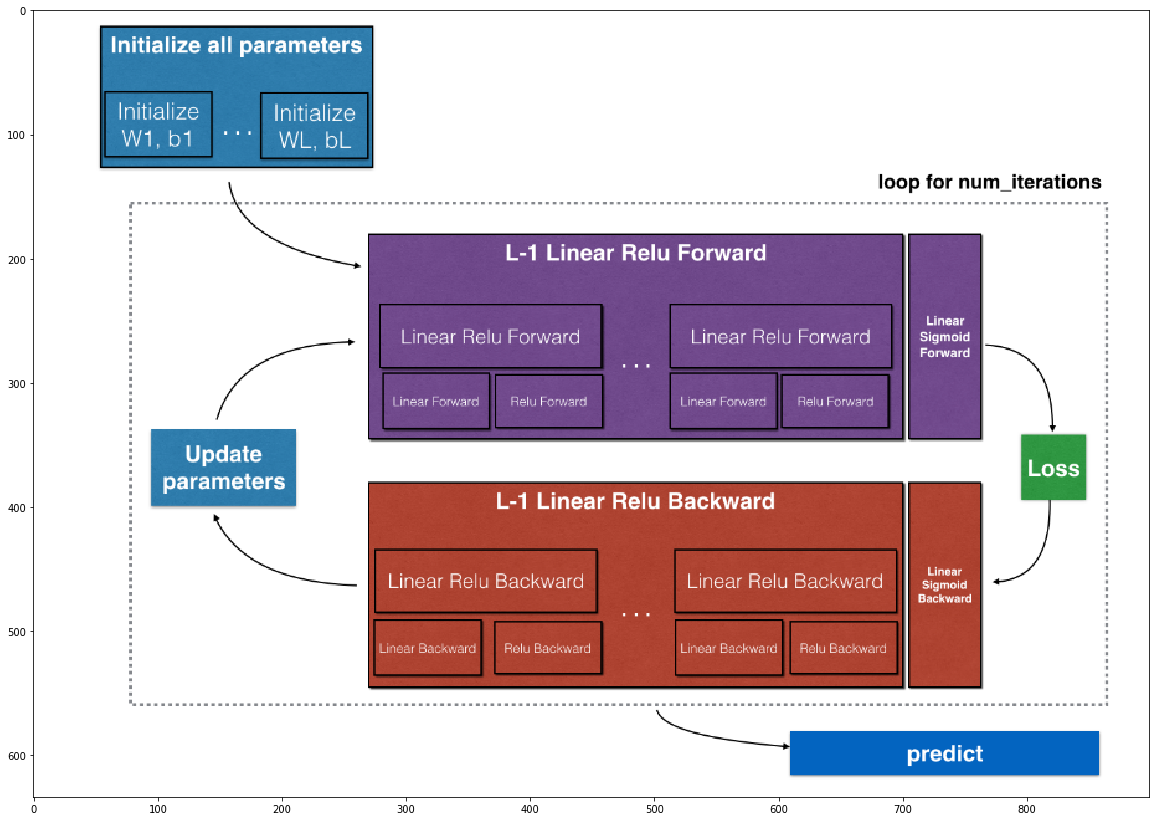

In [2]:
img=Image.open("images/Deep_Neural_Network.png")
plt.figure(figsize=(20,20))
plt.imshow(img)

In [3]:
#初始化参数
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
        
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
                
                
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

In [4]:
#查看
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


# 假设X的维度是（12288，209）

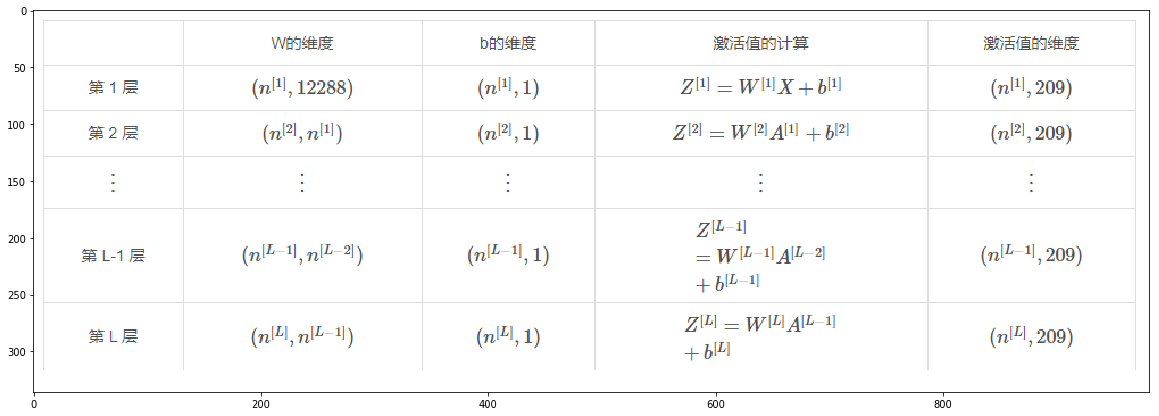

In [5]:
#X的维度
img=Image.open("images/X的维度.png")
plt.figure(figsize=(20,20))
plt.imshow(img)

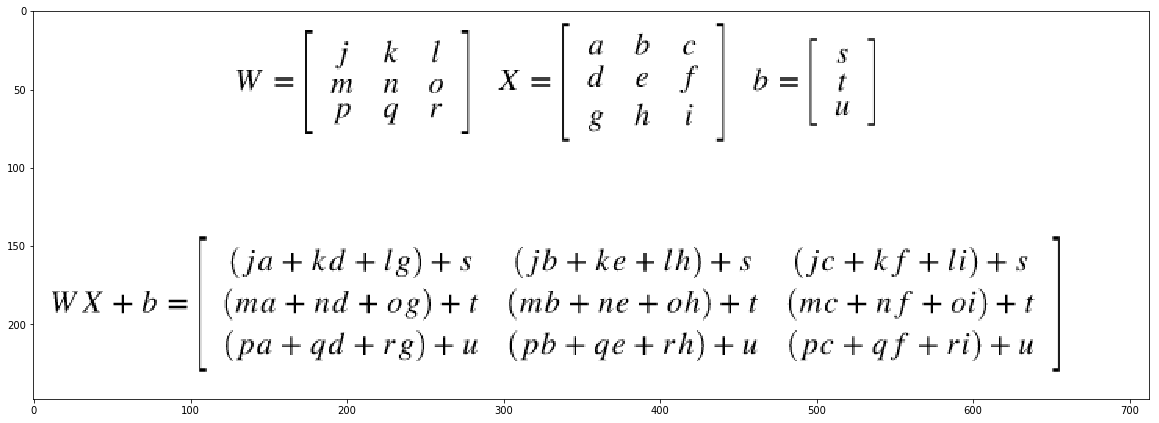

In [6]:
#矩阵计算
img=Image.open("images/矩阵计算.png")
plt.figure(figsize=(20,20))
plt.imshow(img)

In [7]:
def initialize_parameters_deep(layer_dims):
    """
    参数：
        layers_dims - 每层节点数量

    返回：
        parameters - 
                     W - 权重矩阵，维度为（layers_dims [1]，layers_dims [1-1]）
                     b - 偏向量，维度为（layers_dims [1]，1）
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)       

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [8]:
layer_d=[4,3,2,1]
parameters = initialize_parameters_deep(layer_d)
for i in range(1,4):
    print("W" + str(i) + "=" + str(parameters["W"+str(i)]))
    print("b" + str(i) + "=" + str(parameters["b"+str(i)]))

W1=[[ 0.01788628  0.0043651   0.00096497 -0.01863493]
 [-0.00277388 -0.00354759 -0.00082741 -0.00627001]
 [-0.00043818 -0.00477218 -0.01313865  0.00884622]]
b1=[[0.]
 [0.]
 [0.]]
W2=[[ 0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477]]
b2=[[0.]
 [0.]]
W3=[[ 0.00982367 -0.01101068]]
b3=[[0.]]


In [9]:
def linear_forward(A, W, b):
    z=np.dot(W,A)+b
    
    assert(z.shape == (W.shape[0]),A.shape[1])
    
    cache = (A, W, b)
    return z,cache

<ipython-input-9-10cef572b691>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(z.shape == (W.shape[0]),A.shape[1])


In [10]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


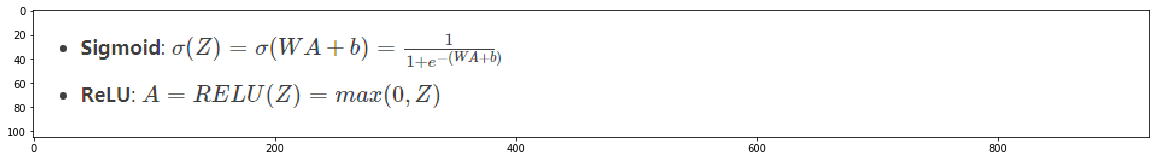

In [11]:
img1=Image.open("images/激活函数sr.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [12]:
#激活函数
def linear_activation_forward(A_prev, W, b, activation):

    #A_prev  上一层的输入
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
 
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [13]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96076066 0.99961336]]
With ReLU: A = [[3.1980455  7.85763489]]


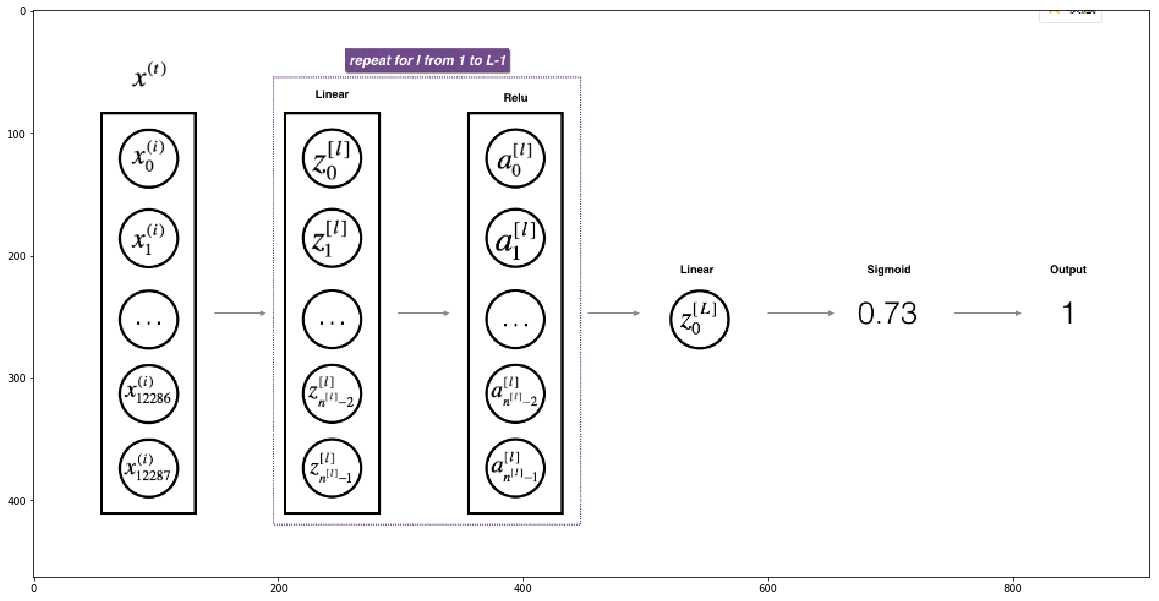

In [14]:
img1=Image.open("images/L层模型.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [15]:
i=5
print(i//2)
print(i/2)
print(-i//2)
print(-i/2)

2
2.5
-3
-2.5


In [16]:
#具体实现。
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # 层数
    
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)
        
        AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
        caches.append(cache)    
        assert(AL.shape == (1, X.shape[1]))
            
    return AL, caches

In [17]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.0844367  0.92356858]]
Length of caches list = 2


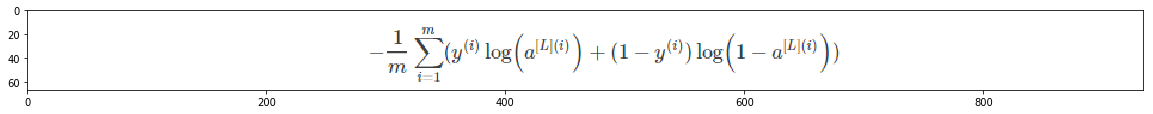

In [18]:
img1=Image.open("images/逻辑回归L层损失函数.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [19]:
#测试np.squeeze
a=np.array([[17]])
b=np.array(17)
c=np.squeeze(a)

In [20]:
print(a.shape)
print(b.shape)
print(c.shape)

(1, 1)
()
()


In [21]:
#计算损失函数
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1 - AL), 1 - Y)) / m

    cost = np.squeeze(cost)
    assert(cost.shape == ())

    return cost


In [22]:
#查看
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


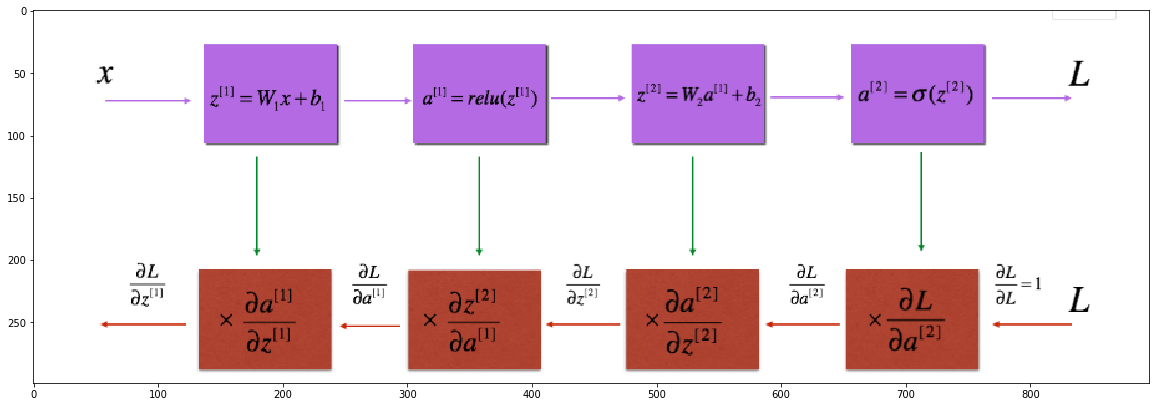

In [23]:

img1=Image.open("images/反向传播.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

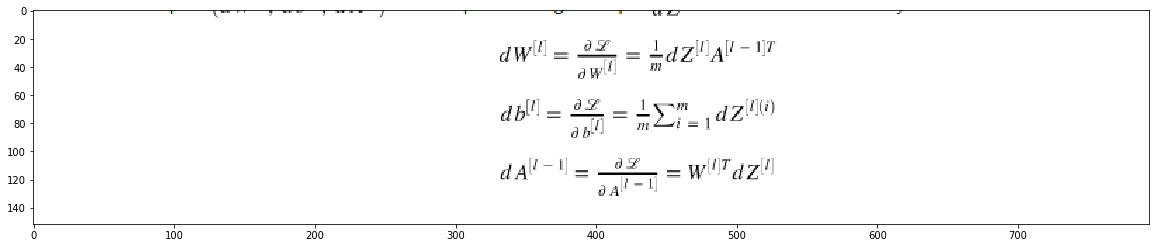

In [24]:
img1=Image.open("images/dw_db_dA公式.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [25]:
def linear_backward(dZ, cache):
    """
    为单层实现反向传播的线性部分（第L层）

    参数：
         dZ - 相对于（当前第l层的）线性输出的成本梯度
         cache - 来自当前层前向传播的值的元组（A_prev，W，b）

    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度，与W的维度相同
         db - 相对于b（当前层l）的成本梯度，与b维度相同
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]


    dW = np.dot(dZ, cache[0].T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(cache[1].T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (isinstance(db, float))
    #assert (db.shape==b.shape)
    
    return dA_prev, dW, db

In [26]:
#查看
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = 0.5062944750065832


In [27]:
def linear_activation_backward(dA,cache,activation="relu"):
    """
    实现LINEAR-> ACTIVATION层的后向传播。

    参数：
         dA - 当前层l的激活后的梯度值
         cache - 我们存储的用于有效计算反向传播的值的元组（值为linear_cache，activation_cache）
         activation - 要在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】
    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度值，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度值，与W的维度相同
         db - 相对于b（当前层l）的成本梯度值，与b的维度相同
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev,dW,db


In [28]:
#查看
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = -0.057296222176291135

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = -0.2083789237027353


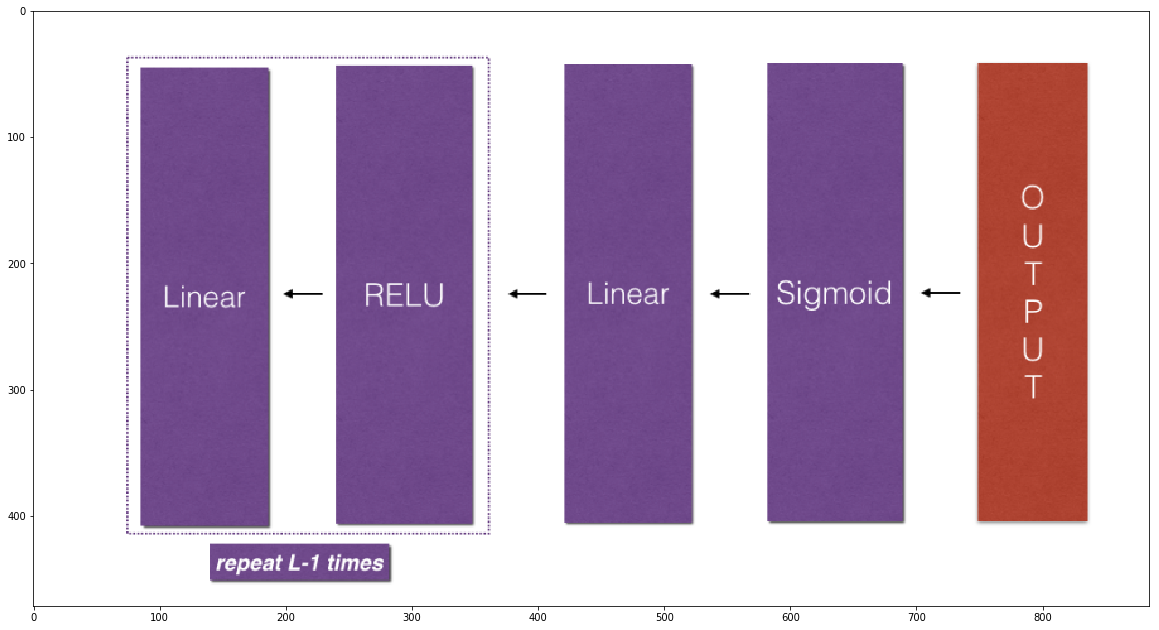

In [29]:

img1=Image.open("images/L层反向传播.png")
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [30]:

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # 层数
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # 
    

    dAL = dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(sigmoid_backward(dAL, 
                                                                                                        current_cache[1]), 
                                                                                       current_cache[0])

    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_backward(sigmoid_backward(dAL, current_cache[1]), current_cache[0])
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [31]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))


dW1 = [[-0.09686122 -0.04840482 -0.11864308]]
db1 = -0.26259499837854655
dA1 = [[-0.71011462 -0.22925516]
 [-0.17330152 -0.05594909]
 [-0.03831107 -0.01236844]]


In [32]:
def update_parameters(parameters, grads, learning_rate):
    """
    使用梯度下降更新参数

    参数：
     parameters - 包含你的参数的字典
     grads - 包含梯度值的字典，是L_model_backward的输出

    返回：
     parameters - 包含更新参数的字典
                   参数[“W”+ str（l）] = ...
                   参数[“b”+ str（l）] = ...
    """
    L = len(parameters) // 2 #整除
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

    return parameters


In [33]:

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = " + str(parameters["W1"]))
print ("b1 = " + str(parameters["b1"]))
print ("W2 = " + str(parameters["W2"]))
print ("b2 = " + str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [34]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    """
    实现一个两层的神经网络，【LINEAR->RELU】 -> 【LINEAR->SIGMOID】
    参数：
        X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    返回:
        parameters - 一个包含W1，b1，W2，b2的字典变量
    """
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x,n_h,n_y) = layers_dims

    """
    初始化参数
    """
    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    """
    开始进行迭代
    """
    for i in range(0,num_iterations):
        #前向传播
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        #计算成本
        cost = compute_cost(A2,Y)

        #后向传播
        ##初始化后向传播
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        ##向后传播，输入：“dA2，cache2，cache1”。 输出：“dA1，dW2，db2;还有dA0（未使用），dW1，db1”。
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        ##向后传播完成后的数据保存到grads
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2

        #更新参数
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回parameters
    return parameters

In [35]:
from dnn_app_utils import *
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


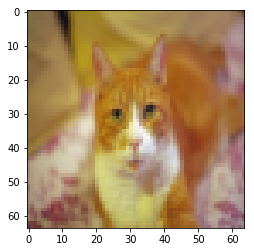

In [36]:
index = 24
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + " picture.")

In [37]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [38]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


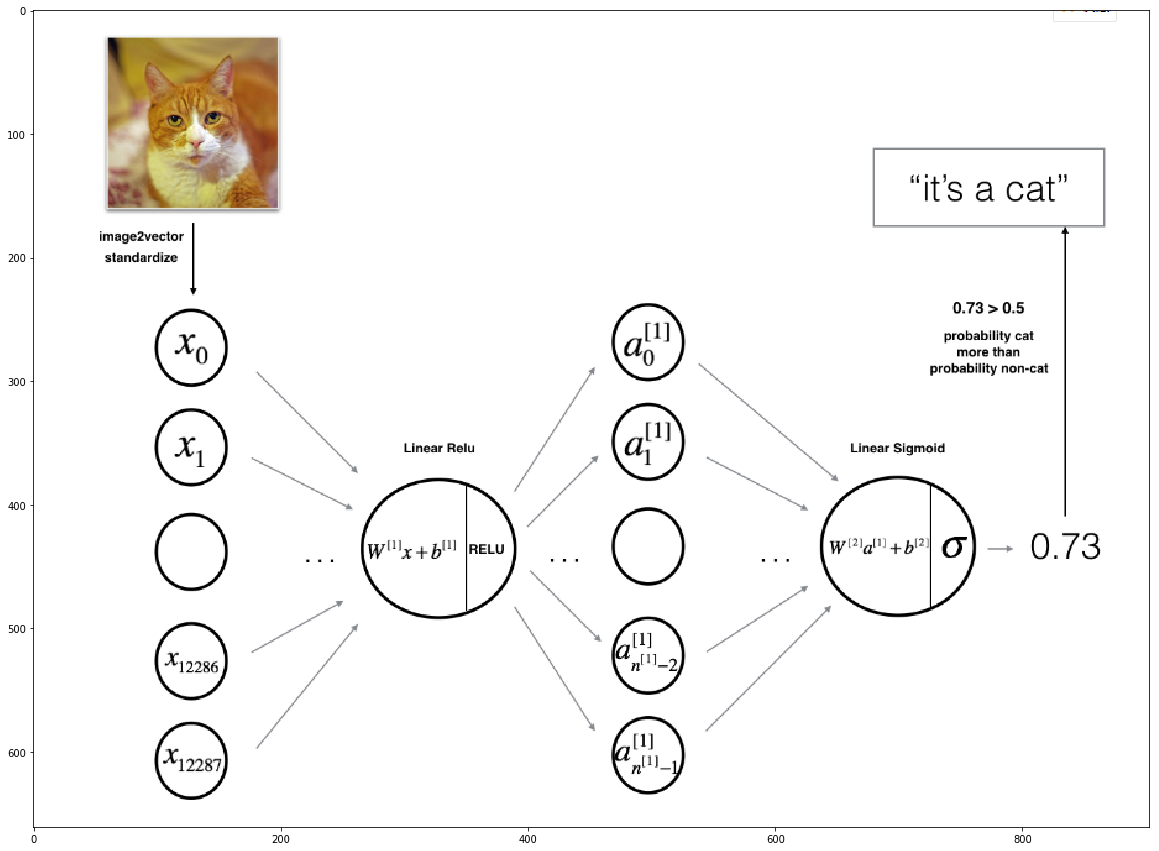

In [39]:
#2层
img=Image.open('images/2layer_network.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

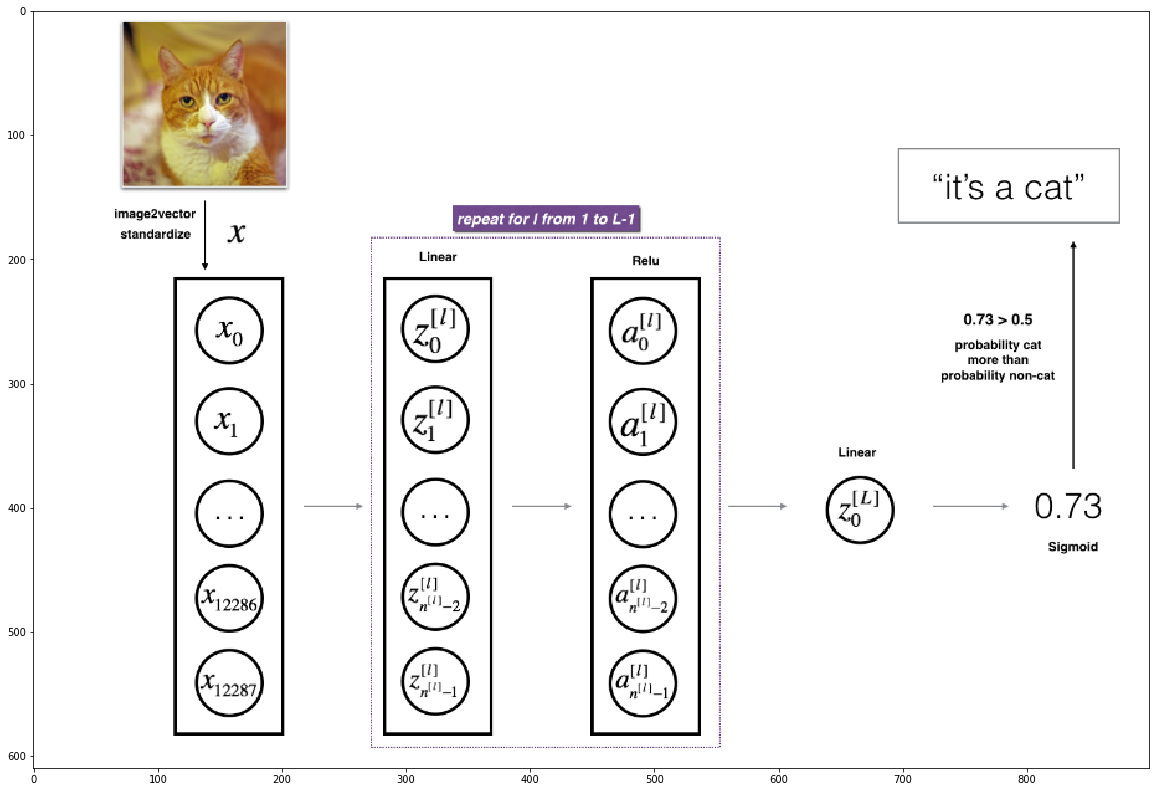

In [40]:
#L层
img1=Image.open('images/Layer_network.png')
plt.figure(figsize=(20,20))
plt.imshow(img1)

In [41]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [42]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    """
    实现一个两层的神经网络，【LINEAR->RELU】 -> 【LINEAR->SIGMOID】
    参数：
        X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    返回:
        parameters - 一个包含W1，b1，W2，b2的字典变量
    """
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x,n_h,n_y) = layers_dims

    """
    初始化参数
    """
    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    """
    开始进行迭代
    """
    for i in range(0,num_iterations):
        #前向传播
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")

        #计算成本
        cost = compute_cost(A2,Y)

        #后向传播
        ##初始化后向传播
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        ##向后传播，输入：“dA2，cache2，cache1”。 输出：“dA1，dW2，db2;还有dA0（未使用），dW1，db1”。
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        ##向后传播完成后的数据保存到grads
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2

        #更新参数
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    #返回parameters
    return parameters


第 0 次迭代，成本值为： 0.693049735659989
第 100 次迭代，成本值为： 0.6464320953428849
第 200 次迭代，成本值为： 0.6325140647912678
第 300 次迭代，成本值为： 0.6015024920354664
第 400 次迭代，成本值为： 0.5601966311605747
第 500 次迭代，成本值为： 0.5158304772764729
第 600 次迭代，成本值为： 0.4754901313943325
第 700 次迭代，成本值为： 0.4339163151225749
第 800 次迭代，成本值为： 0.4007977536203887
第 900 次迭代，成本值为： 0.35807050113237976
第 1000 次迭代，成本值为： 0.33942815383664127
第 1100 次迭代，成本值为： 0.3052753636196265
第 1200 次迭代，成本值为： 0.2749137728213015
第 1300 次迭代，成本值为： 0.24681768210614827
第 1400 次迭代，成本值为： 0.1985073503746609
第 1500 次迭代，成本值为： 0.17448318112556654
第 1600 次迭代，成本值为： 0.17080762978096686
第 1700 次迭代，成本值为： 0.11306524562164708
第 1800 次迭代，成本值为： 0.0962942684593714
第 1900 次迭代，成本值为： 0.08342617959726858
第 2000 次迭代，成本值为： 0.07439078704319078
第 2100 次迭代，成本值为： 0.06630748132267927
第 2200 次迭代，成本值为： 0.059193295010381675
第 2300 次迭代，成本值为： 0.05336140348560557
第 2400 次迭代，成本值为： 0.04855478562877014


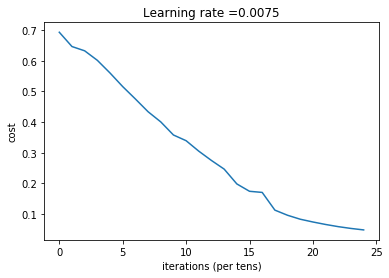

In [44]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


In [45]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [46]:

predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [47]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [48]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False,isPlot=True):
    """
    实现一个L层神经网络：[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID。

    参数：
        X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,···,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱

    返回：
     parameters - 模型学习的参数。 然后他们可以用来预测。
    """
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0,num_iterations):
        AL , caches = L_model_forward(X,parameters)

        cost = compute_cost(AL,Y)

        grads = L_model_backward(AL,Y,caches)

        parameters = update_parameters(parameters,grads,learning_rate)

        #打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            #记录成本
            costs.append(cost)
            #是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    #迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters


Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


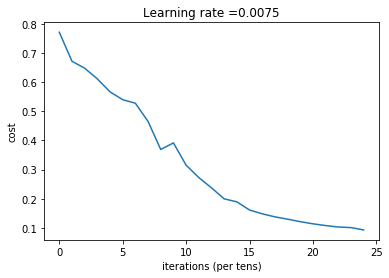

In [48]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

In [49]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143541


In [50]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


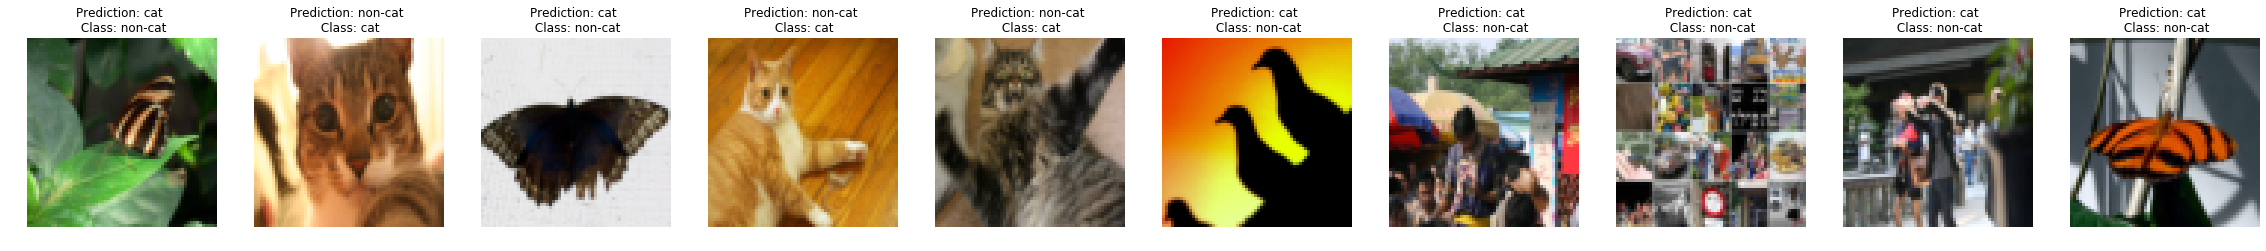

In [51]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

In [52]:
# def print_mislabeled_images(classes, X, y, p):
#     """
#     绘制预测和实际不同的图像。
#         X - 数据集
#         y - 实际的标签
#         p - 预测
#     """
#     a = p + y
#     mislabeled_indices = np.asarray(np.where(a == 1))
#     plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
#     num_images = len(mislabeled_indices[0])
#     for i in range(num_images):
#         index = mislabeled_indices[1][i]

#         plt.subplot(2, num_images, i + 1)
#         plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
#         plt.axis('off')
#         plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [62]:
# def predict(X, y, parameters):
#     """
#     该函数用于预测L层神经网络的结果，当然也包含两层

#     参数：
#      X - 测试集
#      y - 标签
#      parameters - 训练模型的参数

#     返回：
#      p - 给定数据集X的预测
#     """

#     m = X.shape[1]
#     n = len(parameters) // 2 # 神经网络的层数
#     p = np.zeros((1,m))

#     #根据参数前向传播
#     probas, caches = L_model_forward(X, parameters)

#     for i in range(0, probas.shape[1]):
#         if probas[0,i] > 0.5:
#             p[0,i] = 1
#         else:
#             p[0,i] = 0

#     print("准确度为: "  + str(float(np.sum((p == y))/m)))

#     return p

In [ ]:
import scipy
from scipy import ndimage

In [68]:
# my_image = "luffy.jpg"
# my_label_y = [0] 


# fname = "images/" + my_image
# image = np.array(ndimage.imread(fname, flatten=False))
# my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
# my_predicted_image = predict(my_image, my_label_y, parameters)

# plt.imshow(image)
# print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [61]:
my_image

array([[143],
       [219],
       [202],
       ...,
       [141],
       [151],
       [187]], dtype=uint8)

D:\soft\conda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
D:\soft\conda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


准确度为: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


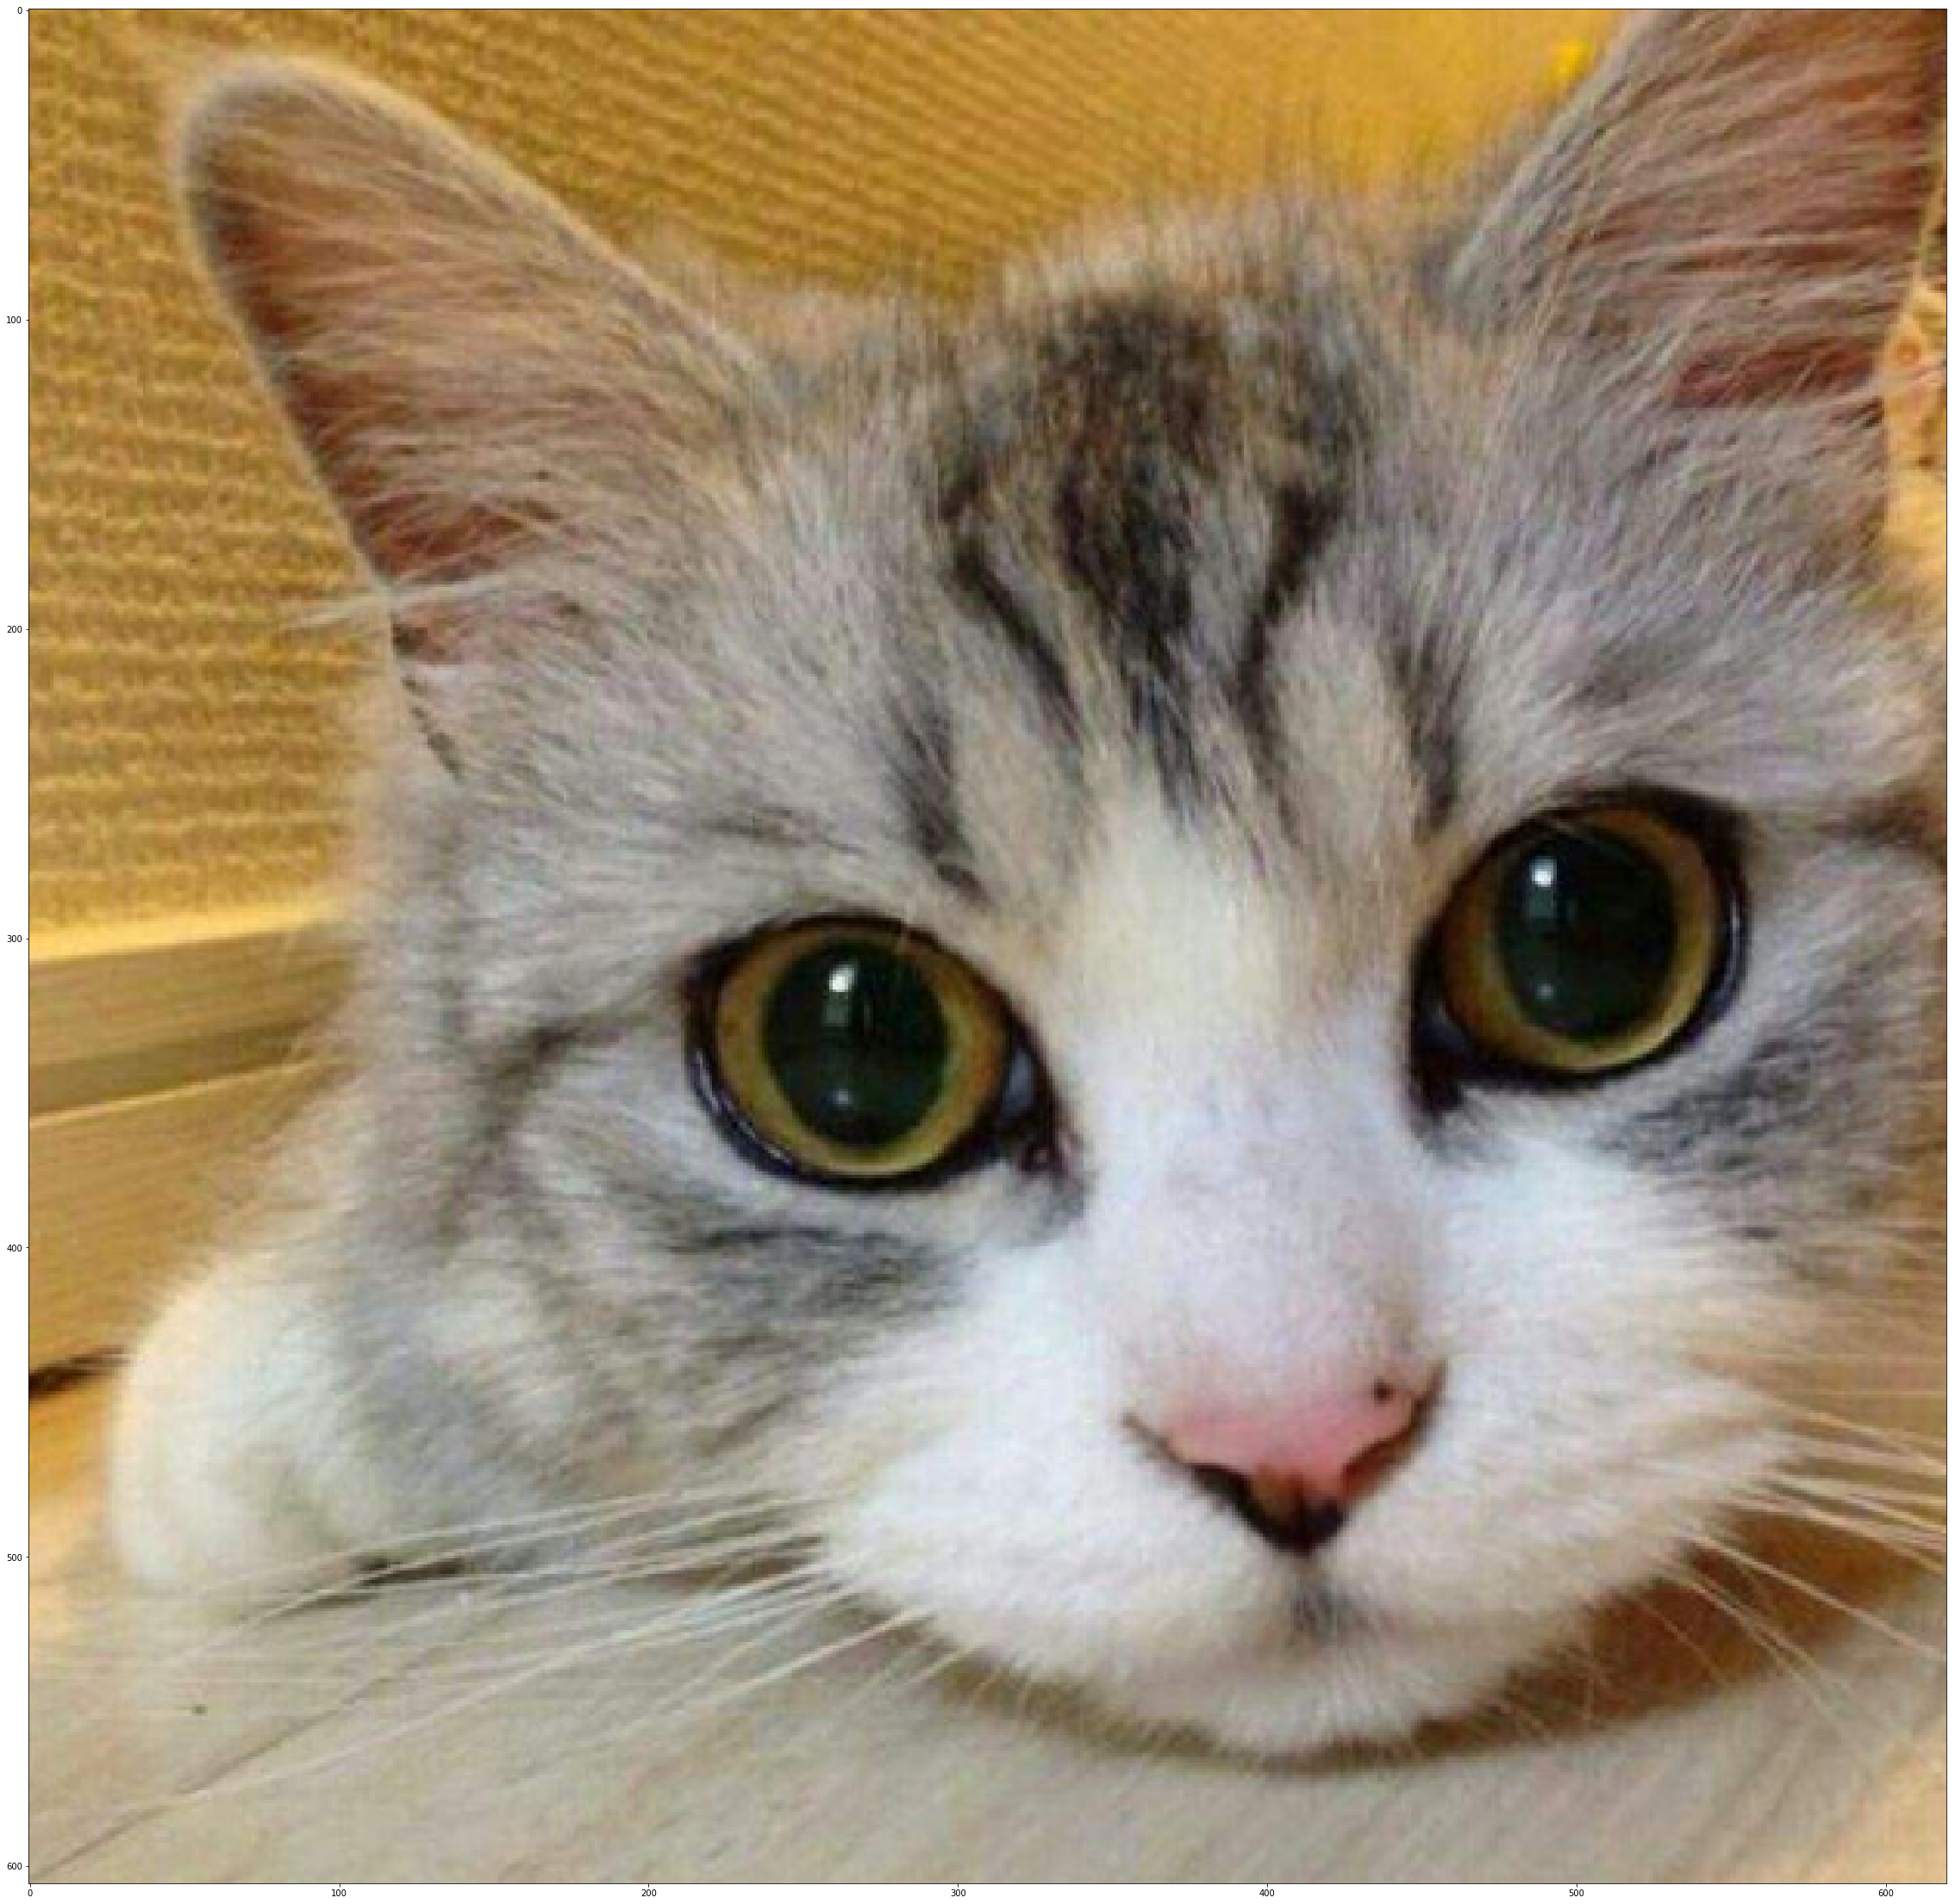

In [57]:
my_image = "猫.png" # change this to the name of your image file 
my_label_y = [1]

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")